In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as mfm
from matplotlib.patches import Rectangle, Circle, PathPatch, Arc
from mpl_toolkits.mplot3d import Axes3D 
import mpl_toolkits.mplot3d.art3d as art3d

np.set_printoptions(precision=4, linewidth=150)

mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']

style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

In [2]:
from matplotlib.text import Text, TextPath
from matplotlib.transforms import Affine2D

# https://matplotlib.org/3.1.1/gallery/mplot3d/pathpatch3d.html
def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):
    '''
    Plots the string 's' on the axes 'ax', with position 'xyz', size 'size',
    and rotation angle 'angle'.  'zdir' gives the axis which is to be treated
    as the third dimension.  usetex is a boolean indicating whether the string
    should be interpreted as latex or not.  Any additional keyword arguments
    are passed on to transform_path.

    Note: zdir affects the interpretation of xyz.
    '''
    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)

In [3]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    """
    https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
    """
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [4]:
A = np.matrix([[1,2],[3,4]])
B = np.matrix([[10,20],[30,40]])

A+B

matrix([[11, 22],
        [33, 44]])

In [5]:
3*B

matrix([[ 30,  60],
        [ 90, 120]])

In [6]:
A = np.array([[1,2,3], [4,5,6]]) #-----[1]
B = np.array([[2,1], [1,2], [1,1]])

np.dot(A,B) #-----[2]

array([[ 7,  8],
       [19, 20]])

In [7]:
A = np.matrix([[1,2],[3,4]])
B = np.matrix([[10,20],[30,40]])

A*B
A.T * B

matrix([[ 70, 100],
        [150, 220]])

In [8]:
A = np.arange(1, 7).reshape(2, 3)

In [9]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [10]:
A.transpose(1, 0)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [11]:
A = np.matrix([[2, 4], [4, 2]])
I = np.matrix(np.eye(2))

print(A*I)
print(I*A)

[[2. 4.]
 [4. 2.]]
[[2. 4.]
 [4. 2.]]


In [12]:
D = np.matrix(np.eye(3)*np.array([2,1,4]))
D.I

matrix([[0.5 , 0.  , 0.  ],
        [0.  , 1.  , 0.  ],
        [0.  , 0.  , 0.25]])

In [13]:
D.I*D

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [14]:
A = np.matrix([[2, 4], [4, 2]])
X = np.matrix([[ 0.7071, -0.7071], [ 0.7071,  0.7071]])
D = X.I*A*X
D

matrix([[ 6.,  0.],
        [ 0., -2.]])

C:\Users\user\AppData\Local\Temp/ipykernel_8348/518509758.py:14: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


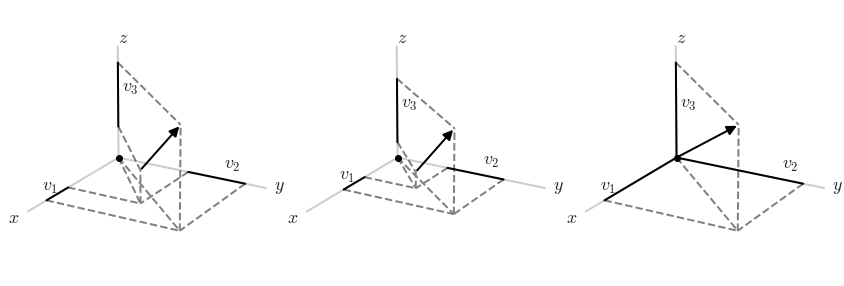

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
fig.set_size_inches((15,5))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.zaxis.set_tick_params(labelsize=15)

ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.zaxis.set_tick_params(labelsize=15)

ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.zaxis.set_tick_params(labelsize=15)

x, y, z = 0, 1, 2
P = np.array([1.5, 1.8, 1])

Q = np.array([2.1, 3.2, 3])
O = (0, 0, 0)

axis_length = Q + 0.5

def draw_vector(ax, P, Q, elev, azim, title=''):
    
    arrow = Arrow3D([P[x], Q[x]], [P[y], Q[y]], [P[z], Q[z]], lw=2, color='k',
                   mutation_scale=20, arrowstyle="-|>" )
    ax.add_artist(arrow)
    ax.axis('off')
    
    ax.plot3D([Q[x], Q[x]], [0, Q[y]], [0,0], '--', color="gray")
    ax.plot3D([P[x], P[x]], [0, P[y]], [0,0], '--', color="gray")

    ax.plot3D([0, Q[x]], [Q[y], Q[y]], [0,0], '--', color="gray")
    ax.plot3D([0, P[x]], [P[y], P[y]], [0,0], '--', color="gray")

    ax.plot3D([P[x], P[x]], [P[y], P[y]], [0, P[z]], '--', color="gray") #p로의 세로선
    ax.plot3D([Q[x], Q[x]], [Q[y], Q[y]], [0, Q[z]], '--', color="gray") #p로의 세로선

    ax.plot3D([0, P[x]], [0, P[y]], [0,0], '--', color="gray")
    ax.plot3D([0, Q[x]], [0, Q[y]], [0,0], '--', color="gray")

    ax.plot3D([0, P[x]], [0, P[y]], [P[z], P[z]], '--', color="gray")
    ax.plot3D([0, Q[x]], [0, Q[y]], [Q[z], Q[z]], '--', color="gray")

    ax.plot3D([P[x], Q[x]], [0, 0], [0,0], lw=2, color='k')
    ax.plot3D([0,0], [P[y], Q[y]], [0,0],  lw=2, color='k')
    ax.plot3D([0,0], [0, 0], [P[z], Q[z]], lw=2, color='k')

    # 축 그리기 
    ax.plot3D([O[x], axis_length[0]], [0, 0], [0, 0], color='k', alpha=0.2)
    ax.text(axis_length[0]+0.5, 0, 0, '$x$', fontsize=18)
    
    ax.plot3D([0,0], [O[y], axis_length[1]], [0, 0], color='k', alpha=0.2)
    ax.text(0, axis_length[1]+0.2, 0, '$y$', fontsize=18)
    
    ax.plot3D([O[x], 0], [O[y], 0], [O[z], axis_length[2]], color='k', alpha=0.2)
    ax.text(0, 0, axis_length[2]+0.1, '$z$', fontsize=18)
    
    ax.plot([O[x]], [O[y]], [O[z]], 'o', color='k')

    # 콤포넌트 그리기
    ax.text(P[x]+(Q[x]-P[x])-0.3, -0.4, 0, '$v_1$', fontsize=18)
    ax.text(-0.4, P[y]+(Q[y]-P[y])-0.8, 0, '$v_2$', fontsize=18)
    ax.text(0, 0.1,  P[z]+(Q[y]-P[z])/2,   '$v_3$', fontsize=18)

    #ax.set_title(title, fontproperties=fontprop)
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$y$', fontsize=20)
    ax.set_zlabel('$z$', fontsize=20)
    
    ax.set_xlim((0, 2.5))
    ax.set_ylim((0, 3.5))
    ax.set_zlim((0, 3.5))
    
    ax.view_init(elev, azim)
    
draw_vector(ax1, P, Q, 20, 30, '벡터와 벡터의 요소')  
draw_vector(ax2, P-0.5, Q-0.5, 20, 30, '이동된 벡터와 벡터의 요소') 
draw_vector(ax3, O, Q, 20, 30, '위치 벡터') 

plt.subplots_adjust(hspace=0.05, wspace=0.0)

plt.show()

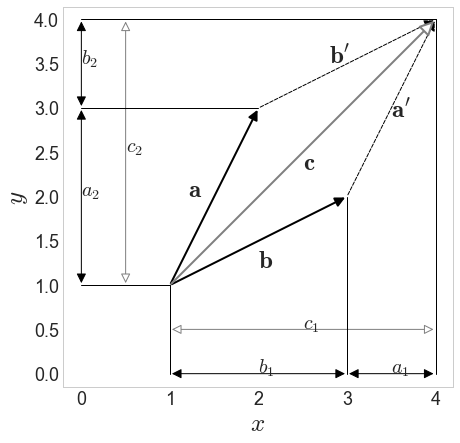

In [18]:
# 벡터 덧셈

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)
ax.grid(False)

a = np.array( [[1, 1],[2, 3]] )
da = a[1]-a[0]

b = np.array( [[1, 1],[3, 2]] )
db = b[1]-b[0]


vec_a = FancyArrowPatch(a[0], a[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_a)

vec_b = FancyArrowPatch(b[0], b[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_b)

a_ = a + db # + db[1]
vec_a_ = FancyArrowPatch(a_[0], a_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_a_)

b_ = b + da
vec_b_ = FancyArrowPatch(b_[0], b_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_b_)

dc = da+db
c = a.copy()
c[1,:] = c[0,:]+dc
vec_c = FancyArrowPatch(c[0], c[1], lw=2, color='white', mutation_scale=30, arrowstyle="-|>", ec='gray')
ax.add_patch(vec_c)

# 가로 선
ax.plot( (0, a[0,0]),(a[0,1], a[0,1]), lw=1, color='k' )
ax.plot( (0, a[1,0]),(a[1,1], a[1,1]), lw=1, color='k' )
ax.plot( (0, a_[1,0]),(a_[1,1], a_[1,1]), lw=1, color='k' )

# 세로 선
ax.plot( (a[0,0], a[0,0]), (0, a[0,1]), lw=1, color='k' )
ax.plot( (b[1,0], b[1,0]), (0, b[1,1]), lw=1, color='k' )
ax.plot( (b_[1,0], b_[1,0]), (0, b_[1,1]), lw=1, color='k' )

vec_ay = FancyArrowPatch((0.0, a[0,1]), (0.0, a[1,1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ay)

vec_by = FancyArrowPatch((0.0, a[1,1]), (0.0, a[1,1]+db[1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_by)

vec_cy = FancyArrowPatch((0.5,c[0,1]), (0.5,c[1,1]), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cy)

vec_ax = FancyArrowPatch((a[0,0], 0.0), (b[1,0], 0.0), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ax)

vec_bx = FancyArrowPatch((b[1,0], 0.0), (a[1,1]+da[0], 0.0), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_bx)

vec_cx = FancyArrowPatch((c[0,0],0.5), (c[1,0],0.5), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cx)

ax.text(1.2, 2, r"$\mathbf{a}$", fontsize=25)
ax.text(3.5, 2.9, r"$\mathbf{a}'$", fontsize=25)
ax.text(2, 1.2, r"$\mathbf{b}$", fontsize=25)
ax.text(2.8, 3.5, r"$\mathbf{b}'$", fontsize=25)
ax.text(2.5, 2.3, r"$\mathbf{c}$", fontsize=25)

ax.text(0.5, 2.5, r"$c_2$", fontsize=20)
ax.text(0.0, 2.0, r"$a_2$", fontsize=20)
ax.text(0.0, 3.5, r"$b_2$", fontsize=20)

ax.text(2.5, 0.5, r"$c_1$", fontsize=20)
ax.text(2.0, 0.0, r"$b_1$", fontsize=20)
ax.text(3.5, 0.0, r"$a_1$", fontsize=20)

plt.axis('equal')

plt.show()

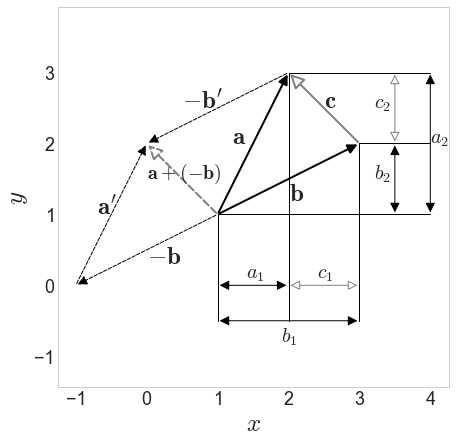

In [19]:
# 벡터 뺄셈

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x$', fontsize=25)
ax.set_ylabel(r'$y$', fontsize=25)
ax.grid(False)

a = np.array( [[1, 1],[2, 3]] )
da = a[1]-a[0]

b = np.array( [[1, 1],[3, 2]] )
db = b[1]-b[0]

vec_a = FancyArrowPatch(a[0], a[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_a)

vec_b = FancyArrowPatch(b[0], b[1], lw=2, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_b)

minus_b = b.copy()
minus_b[1,:] = minus_b[0,:]-db
vec_minus_b = FancyArrowPatch(minus_b[0], minus_b[1], ls='--', lw=1, color='k', mutation_scale=20, arrowstyle="-|>")
ax.add_patch(vec_minus_b)

a_ = a - db # + db[1]
vec_a_ = FancyArrowPatch(a_[0], a_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_a_)

b_ = minus_b + da
vec_b_ = FancyArrowPatch(b_[0], b_[1], lw=1, color='k', mutation_scale=20, arrowstyle="-|>", ls='--')
ax.add_patch(vec_b_)

db_ = minus_b[1]-minus_b[0]
dc_ = da+db_
c_ = a.copy()
c_[1,:] = c_[0,:]+dc_
vec_c_ = FancyArrowPatch(c_[0], c_[1], lw=2, color='white', mutation_scale=30, arrowstyle="-|>", ec='gray', ls='--')
ax.add_patch(vec_c_)

dc = da-db
c = b.copy()
c[0,:] = c[1,:]
c[1,:] = c[0,:]+dc

vec_c = FancyArrowPatch(c[0], c[1], lw=2, color='white', mutation_scale=30, arrowstyle="-|>", ec='gray')
ax.add_patch(vec_c)

# 세로 선
ax.plot( (a[0,0], a[0,0]), (-0.5, a[0,1]), lw=1, color='k' )
ax.plot( (a[1,0], a[1,0]), (-0.5, a[1,1]), lw=1, color='k' )
ax.plot( (b[1,0], b[1,0]), (-0.5, b[1,1]), lw=1, color='k' )

# 가로 선
ax.plot( (a[0,0], 4), (a[0,1], a[0,1]), lw=1, color='k' )
ax.plot( (b[1,0], 4), (b[1,1], b[1,1]), lw=1, color='k' )
ax.plot( (a[1,0], 4), (a[1,1], a[1,1]), lw=1, color='k' )

vec_ay = FancyArrowPatch((4.0, a[0,1]), (4.0, a[1,1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ay)

vec_by = FancyArrowPatch((3.5, b[0,1]), (3.5, b[1,1]), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_by)

vec_cy = FancyArrowPatch((3.5, c[0,1]), (3.5,c[1,1]), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cy)

vec_bx = FancyArrowPatch((a[0,0], -0.5), (b[1,0], -0.5), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_bx)

vec_ax = FancyArrowPatch((a[0,0], 0.0), (a[1,0], 0.0), lw=1, mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(vec_ax)

vec_cx = FancyArrowPatch((c[0,0],0.0), (c[1,0],0.0), lw=1, color='white', mutation_scale=20, arrowstyle="<|-|>", ec='gray')
ax.add_patch(vec_cx)

ax.text(1.2, 2, r"$\mathbf{a}$", fontsize=25)
ax.text(-0.7, 1.0, r"$\mathbf{a}'$", fontsize=25)
ax.text(2, 1.2, r"$\mathbf{b}$", fontsize=25)
ax.text(0, 0.3, r"$-\mathbf{b}$", fontsize=25)
ax.text(0.5, 2.5, r"$-\mathbf{b}'$", fontsize=25)

ax.text(2.4, 0.1, r"$c_1$", fontsize=20)
ax.text(1.4, 0.1, r"$a_1$", fontsize=20)
ax.text(1.9, -0.8, r"$b_1$", fontsize=20)

ax.text(3.2, 2.5, r"$c_2$", fontsize=20)
ax.text(4.0, 2.0, r"$a_2$", fontsize=20)
ax.text(3.2, 1.5, r"$b_2$", fontsize=20)

ax.text(0, 1.5, r"$\mathbf{a}+(-\mathbf{b})$", fontsize=20)
ax.text(2.5, 2.5, r"$\mathbf{c}$", fontsize=25)

plt.axis('equal')

plt.show()

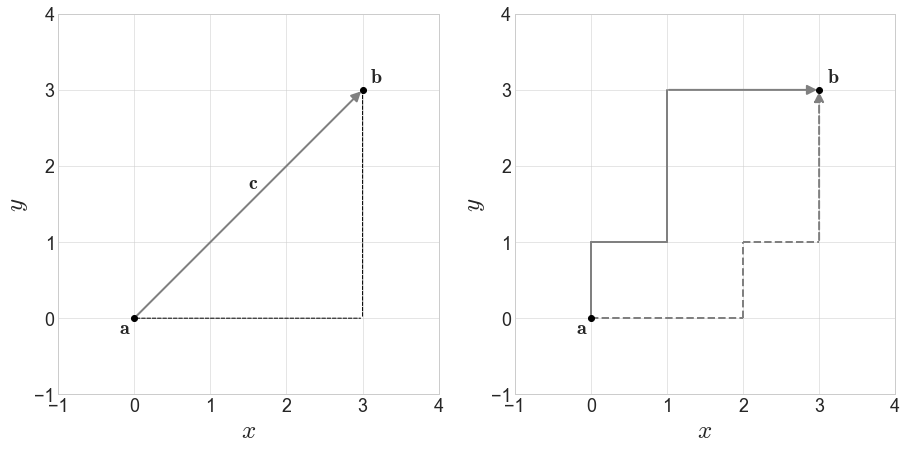

In [22]:
# norm ㅣ2, ㅣ1

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$y$', fontsize=25)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylabel(r'$y$', fontsize=25)

a = np.array([0, 0])
b = np.array([3, 3])
vec_a = FancyArrowPatch((0, 0), (3, 0) , lw=1, mutation_scale=20, arrowstyle="-", color='k', ls='--')
ax1.add_patch(vec_a)

vec_b = FancyArrowPatch((3, 0), (3, 3) , lw=1, mutation_scale=20, arrowstyle="-", color='k', ls='--')
ax1.add_patch(vec_b)

c = np.array( [a, b] )
dc = c[1]-c[0]
vec_c = FancyArrowPatch(c[0], c[1], lw=2, mutation_scale=20, arrowstyle="-|>", color='gray')
ax1.add_patch(vec_c)

ax1.plot(*a, 'o', color='k')
ax1.plot(*b, 'o', color='k')

ax1.text(-0.2,-0.2, r"$\mathbf{a}$", fontsize=20)
ax1.text(3.1, 3.1, r"$\mathbf{b}$", fontsize=20)
ax1.text(1.5, 1.7, r"$\mathbf{c}$", fontsize=20)
#ax1.set_title("L2 거리", fontsize=20, fontproperties=fontprop)
ax1.set_xlim(-1, 4)
ax1.set_ylim(-1, 4)

ax2.plot((0, 0), (0, 1), lw=2, color='gray')
ax2.plot((0, 1), (1, 1), lw=2, color='gray')
ax2.plot((1, 1), (1, 3), lw=2, color='gray')
# ax2.plot((1, 3), (3, 3), lw=2, color='gray')
vec_a = FancyArrowPatch((1, 3), (3, 3) , lw=2, mutation_scale=20, arrowstyle="-|>", color='gray')
ax2.add_patch(vec_a)

ax2.plot((0, 2), (0, 0), lw=2, ls='--', color='gray')
ax2.plot((2, 2), (0, 1), lw=2, ls='--', color='gray')
ax2.plot((2, 3), (1, 1), lw=2, ls='--', color='gray')
vec_b = FancyArrowPatch((3, 1), (3, 3) , lw=2, mutation_scale=20, ls='--', arrowstyle="-|>", color='gray')
ax2.add_patch(vec_b)

ax2.plot(*a, 'o', color='k')
ax2.plot(*b, 'o', color='k')
ax2.text(-0.2,-0.2, r"$\mathbf{a}$", fontsize=20)
ax2.text(3.1, 3.1, r"$\mathbf{b}$", fontsize=20)
#ax2.set_title("L1 거리", fontsize=20, fontproperties=fontprop)
ax2.set_xlim(-1, 4)
ax2.set_ylim(-1, 4)

plt.show()

(-1.0, 1.0, -1.0, 1.0)

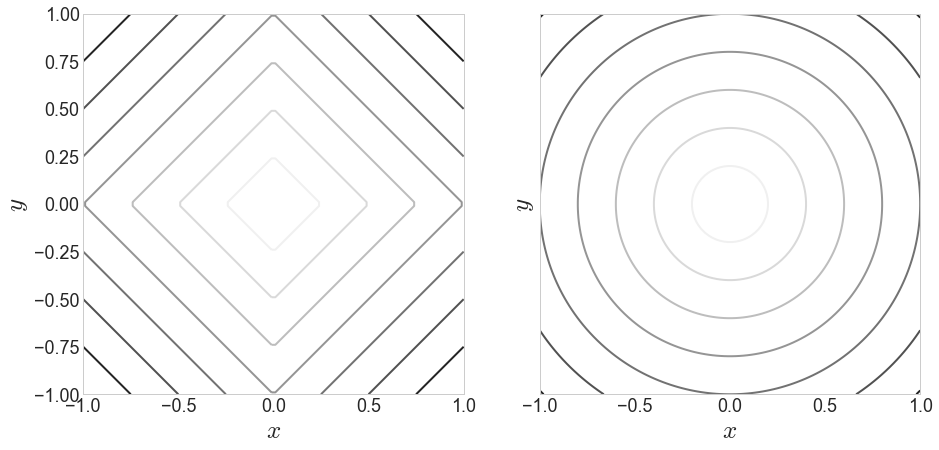

In [24]:
# 거리함수 L1, L2

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches((15,7))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylabel(r'$y$', fontsize=25)
ax2.grid(False)

l1 = lambda x1, x2 : np.abs(x1) + np.abs(x2)
l2 = lambda x1, x2 : np.sqrt(x1**2 + x2**2)

x = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x, x)

L1 = l1(X1,X2)
L2 = l2(X1,X2)

ax1.contour(X1, X2, L1)
#ax1.set_title("L1 거리 함수", fontsize=20, fontproperties=fontprop)
ax1.axis('equal')

ax2.contour(X1, X2, L2)
#ax2.set_title("L2 거리 함수", fontsize=20, fontproperties=fontprop)
ax2.axis('equal')

In [31]:
def cube2d(ax, origin, dx=1, dy=1, dc=0.1, axis='off', hidden=False):
    x0, y0 = origin
    
    if hidden==False:
        ax.plot((x0, x0+dx), (y0, y0), lw=2, color='k')
        ax.plot((x0+dx, x0+dx), (y0, y0+dy), lw=2, color='k')
        ax.plot((x0+dx, x0), (y0+dy, y0+dy), lw=2, color='k')
        ax.plot((x0, x0), (y0+dy, y0), lw=2, color='k')

    ax.plot((x0, x0+dc), (y0+dy, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dx, x0+dx+dc), (y0+dy, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dx, x0+dx+dc), (y0, y0+dc), lw=2, color='k')
    
    ax.plot((x0+dc, x0+dx+dc), (y0+dy+dc, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dc, x0+dx+dc), (y0+dy+dc, y0+dy+dc), lw=2, color='k')
    ax.plot((x0+dx+dc, x0+dx+dc), (y0+dy+dc, y0+dc), lw=2, color='k')
    
    ax.axis(axis)

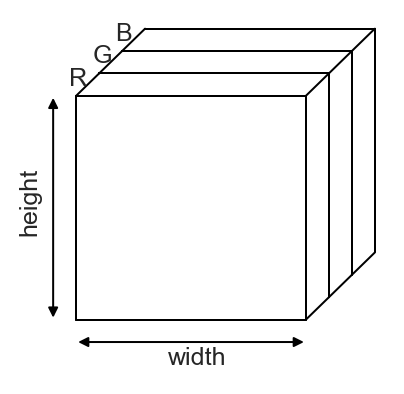

In [32]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
    
cube2d(ax, (0, 0))
cube2d(ax, (0.1, 0.1), hidden=True)
cube2d(ax, (0.2, 0.2), hidden=True)

width = FancyArrowPatch((0, -0.1), (1, -0.1), lw=2,  mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(width)

height = FancyArrowPatch((-0.1, 0), (-0.1, 1), lw=2,  mutation_scale=20, arrowstyle="<|-|>", color='k')
ax.add_patch(height)

ax.text(0.4, -0.2, "width", fontsize=25)
ax.text(-0.25, 0.4, "height", fontsize=25, rotation=90)

ax.text(-0.03, 1.05, "R", fontsize=25)
ax.text(0.07, 1.15, "G", fontsize=25)
ax.text(0.17, 1.25, "B", fontsize=25)

ax.set_xlim(-0.3, 1.4)
ax.set_ylim(-0.3, 1.4)

plt.show()

In [36]:
import matplotlib.pyplot as plt

im = plt.imread("noviceml/img/old_python.png")
print(im.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

ax.imshow(im)


FileNotFoundError: [Errno 2] No such file or directory: 'noviceml/img/old_python.png'

In [37]:
R = im[:,:,0]
G = im[:,:,1]
B = im[:,:,2]
A = im[:,:,3]

NameError: name 'im' is not defined

NameError: name 'R' is not defined

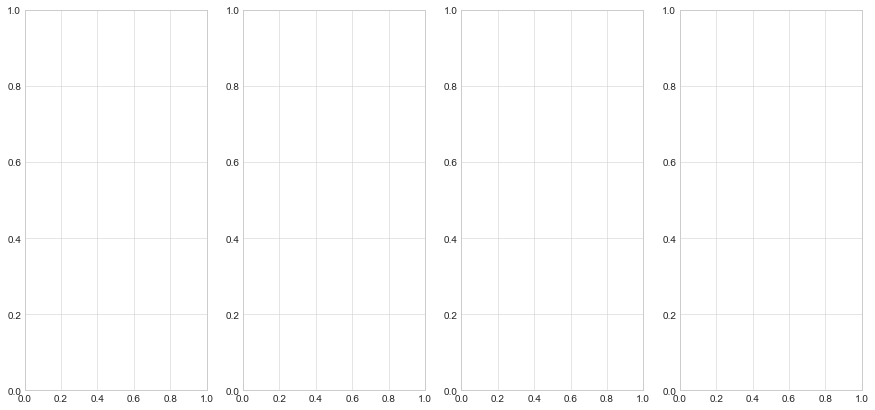

In [38]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(R)
ax1.set_title("Red")
ax2.imshow(G)
ax2.set_title("Green")
ax3.imshow(B)
ax3.set_title("Blue")
ax4.imshow(A)
ax4.set_title("Alpha")

plt.show()

In [39]:
docs = [
'This is the first document',
'This is the second document',
'And the third one',
'Is this the first document']

V = ['<NULL>', 'and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [40]:
docs

['This is the first document',
 'This is the second document',
 'And the third one',
 'Is this the first document']

In [41]:
pre_docs = list(map(lambda x : x.lower().split(), docs))
pre_docs

D = [[V.index(w) for w in doc] for doc in pre_docs ]

print(D)

[[9, 4, 7, 3, 2], [9, 4, 7, 6, 2], [1, 7, 8, 5], [4, 9, 7, 3, 2]]


In [42]:
N = max([len(doc) for doc in pre_docs])

In [43]:
N = max([len(doc) for doc in pre_docs]) #-----[1]
pre_docs = [doc + ['<NULL>']*(N-len(doc)) for doc in pre_docs] #-----[2]
pre_docs

[['this', 'is', 'the', 'first', 'document'],
 ['this', 'is', 'the', 'second', 'document'],
 ['and', 'the', 'third', 'one', '<NULL>'],
 ['is', 'this', 'the', 'first', 'document']]

In [44]:
D = [[V.index(w) for w in doc] for doc in pre_docs ]
D = np.array(D)
D

array([[9, 4, 7, 3, 2],
       [9, 4, 7, 6, 2],
       [1, 7, 8, 5, 0],
       [4, 9, 7, 3, 2]])

In [45]:
A = np.array([1,2,3,4])
A

array([1, 2, 3, 4])

In [46]:
B = np.array([[1,2],[3,4]])
B

array([[1, 2],
       [3, 4]])

In [47]:
A.shape

(4,)

In [48]:
B.shape

(2, 2)

In [49]:
A.reshape(1,4)

array([[1, 2, 3, 4]])

In [50]:
A.reshape(1,4).shape

(1, 4)

In [51]:
A.reshape(4,1)

array([[1],
       [2],
       [3],
       [4]])

In [52]:
A.reshape(4,1).shape

(4, 1)

In [53]:
np.random.rand(3,2) # 0에서 1사이의 무작위 소수로 채워진 3행 2열 ndarray 생성

array([[0.6415, 0.1181],
       [0.9453, 0.9015],
       [0.4276, 0.0218]])

In [54]:
np.ones((3,2)) # 모두 1로 채워진 3행 2열 ndarray 생성

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [55]:
np.ones_like(A) # A라는 ndarray와 모양은 같고 모두 1로 채워진 ndarray 생성

array([1, 1, 1, 1])

In [56]:
np.zeros((3,2)) # 모두 0으로 채워진 3행 2열 ndarray 생성

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [57]:
np.zeros_like(A) # A라는 ndarray와 모양은 같고 모두 0으로 채워진 ndarray 생성

array([0, 0, 0, 0])

In [58]:
np.full((3,2), 10) # 모두 10으로 채워진 3행 2열 ndarray 생성

array([[10, 10],
       [10, 10],
       [10, 10]])

In [59]:
np.arange(10) # 0부터 9까지 순차적인 자연수로 ndarray를 생성

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
np.random.seed(12)

A = np.random.randint(0,9,4).reshape(2,2)
B = np.random.randint(0,9,4).reshape(2,2)+1

In [61]:
A

array([[6, 1],
       [2, 3]])

In [62]:
B

array([[4, 1],
       [7, 2]])

In [63]:
A+B

array([[10,  2],
       [ 9,  5]])

In [64]:
A-B

array([[ 2,  0],
       [-5,  1]])

In [65]:
A/B

array([[1.5   , 1.    ],
       [0.2857, 1.5   ]])

In [66]:
A*B

array([[24,  1],
       [14,  6]])

In [67]:
np.dot(A,B)

array([[31,  8],
       [29,  8]])

In [68]:
A = np.arange(1, 7).reshape(2, 3) 
A

array([[1, 2, 3],
       [4, 5, 6]])

In [69]:
A.transpose(1, 0) 

array([[1, 4],
       [2, 5],
       [3, 6]])

In [70]:
A = np.arange(1, 13).reshape(2, 2, -1)
A

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [71]:
A.T

array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [72]:
A = np.arange(1, 13).reshape(2, 2, -1)
A.transpose(1,0,2)

array([[[ 1,  2,  3],
        [ 7,  8,  9]],

       [[ 4,  5,  6],
        [10, 11, 12]]])

In [73]:
A = np.arange(30).reshape(5,6)
A

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [74]:
A[0,2]

2

In [75]:
A[2,3]

15

In [76]:
A[:, 0::2]

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22],
       [24, 26, 28]])

In [92]:
A[ :3 , : : 2]

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

In [93]:
np.array([A[0,1], A[1,2], A[2,3], A[3,1], A[4,0]])

array([ 1,  8, 15, 19, 24])

In [94]:
A[[0,1,2,3,4], [1,2,3,1,0]] # A[np.arange(4), [1,2,3,1,0]]

array([ 1,  8, 15, 19, 24])

In [95]:
A > 20

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [96]:
A[A > 20]

array([21, 22, 23, 24, 25, 26, 27, 28, 29])

In [97]:
A = np.array([1,2,3])
A * 2

array([2, 4, 6])